In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#distance
import gower

# custom modules
import importlib
import utils
importlib.reload(utils)
import preprocessing
importlib.reload(preprocessing)

# preprocessing tools
from sklearn.neighbors import LocalOutlierFactor

## knee method
from kneed import KneeLocator


[-1  0  0 ...  0  0  0]


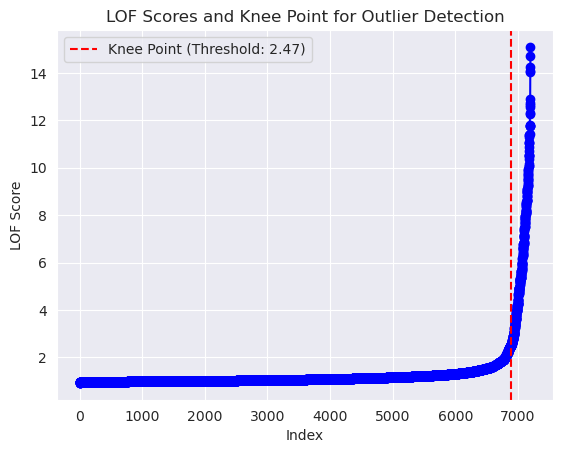

In [22]:
# Load the dataset
df = preprocessing.load_dataset()

# Set the number of neighbors
n_neighbors = 15

# Initialize the model
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination='auto')

# Fit the model
lof.fit(df)

# Compute the LOF scores
lof_scores = -lof.negative_outlier_factor_

# Use the knee method to find the optimal threshold
kn = KneeLocator(range(len(lof_scores)), 
                 np.sort(lof_scores), 
                 curve='convex', 
                 direction='increasing')
optimal_threshold = np.sort(lof_scores)[kn.knee]

# Predict outliers
predictions = lof.fit_predict(df)
outlier_indices = np.where(lof_scores > optimal_threshold, -1, 0)

# Return outlier indices
print(outlier_indices)

# Optionally, visualize the knee point and threshold
plt.figure()
plt.plot(range(len(lof_scores)), np.sort(lof_scores), marker='o', linestyle='-', color='b')
plt.axvline(x=kn.knee, color='r', linestyle='--', label=f'Knee Point (Threshold: {optimal_threshold:.2f})')
plt.xlabel('Index')
plt.ylabel('LOF Score')
plt.title('LOF Scores and Knee Point for Outlier Detection')
plt.legend()
plt.show()

In [24]:
pd.DataFrame(outlier_indices * -1).value_counts()

0    6881
1     319
Name: count, dtype: int64

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.048s...
[t-SNE] Computed neighbors for 7200 samples in 0.540s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.003135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.468597
[t-SNE] KL divergence after 1000 iterations: 0.978423


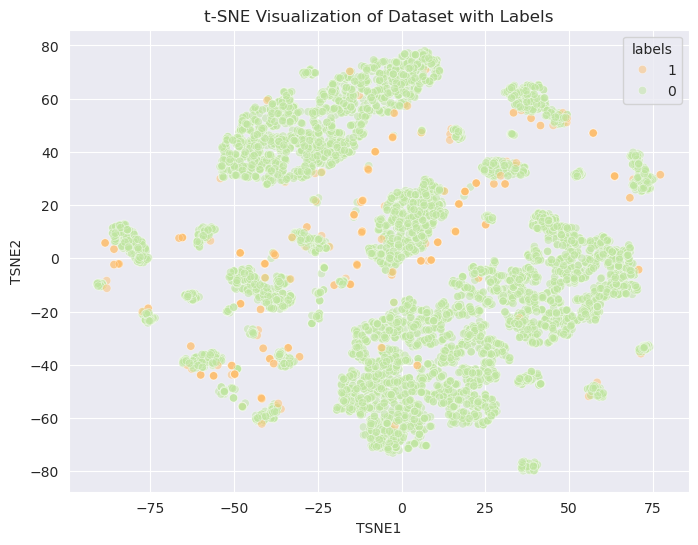

In [25]:
utils.plot_TSNE(df, labels=-1* outlier_indices, dist_matrix=gower.gower_matrix(df))

In [26]:
utils.plot_3d_TSNE(df, labels= -1 * outlier_indices, dist_matrix=gower.gower_matrix(df))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.025s...
[t-SNE] Computed neighbors for 7200 samples in 0.523s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.003135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.711845
[t-SNE] KL divergence after 1000 iterations: 0.831202
